In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
bakery_sales_data = pd.read_csv('/content/Bakery sales.csv')

## Структура даних

* Перевірити загальну структуру та зміст датасету.
* Визначити типи змінних (текстові/числові) та їх призначення.

In [ ]:
bakery_sales_data.head(10)

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price
0,0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €"
1,1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €"
2,4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €"
3,5,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €"
4,8,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €"
5,11,2021-01-02,09:25,150043.0,BAGUETTE,2.0,"0,90 €"
6,12,2021-01-02,09:25,150043.0,CROISSANT,3.0,"1,10 €"
7,15,2021-01-02,09:27,150044.0,BANETTE,1.0,"1,05 €"
8,18,2021-01-02,09:32,150045.0,TRADITIONAL BAGUETTE,3.0,"1,20 €"
9,19,2021-01-02,09:32,150045.0,CROISSANT,6.0,"1,10 €"


In [ ]:
bakery_sales_data.shape

(234005, 7)

In [ ]:
bakery_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234005 entries, 0 to 234004
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     234005 non-null  int64  
 1   date           234005 non-null  object 
 2   time           234005 non-null  object 
 3   ticket_number  234005 non-null  float64
 4   article        234005 non-null  object 
 5   Quantity       234005 non-null  float64
 6   unit_price     234005 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 12.5+ MB


**Структура:**

* *Unnamed: 0* – схоже на індекс, який можна видалити.
* *date* – дата транзакції.
* *time* – час транзакції.
* *ticket_number* – ідентифікатор кожної транзакції.
* *article* – назва товару французькою.
* *Quantity* – кількість проданого товару.
* *unit_price* – ціна за одиницю товару, записана у форматі "0,90 €".

## Перевірка якості даних
* Видалення колонки Unnamed: 0.
* Перейменування назв колонок у єдиний формат.
* Перетворення date у формат дати, а time у формат часу.
* Перевірка наявністі нульових значень та дублікатів.
* Конвертація unit_price у числовий формат.
* Аналіз викидів та загальних розподілів даних.

In [ ]:
# Видалення колонки Unnamed: 0
bakery_sales_data.drop(columns=['Unnamed: 0'], inplace=True)
bakery_sales_data.head()

,date,time,ticket_number,article,Quantity,unit_price
0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €"
1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €"
2,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €"
3,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €"
4,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €"


In [ ]:
# Перейменування стовпців
bakery_sales_data.rename(columns={
    "date": "Date",
    "time": "Time",
    "ticket_number": "Ticket_Number",
    "article": "Product_Name",
    "Quantity": "Quantity_Sold",
    "unit_price": "Unit_Price (€)"
}, inplace=True)

In [ ]:
# Конвертація стовпців у відповідні формати
bakery_sales_data['Date'] = pd.to_datetime(bakery_sales_data['Date'], format='%Y-%m-%d')
bakery_sales_data['Time'] = pd.to_datetime(bakery_sales_data['Time'], format='%H:%M').dt.time

In [ ]:
# Перетворення ціни у числовий формат (видалення символів € і заміна коми на крапку)
bakery_sales_data['Unit_Price (€)'] = bakery_sales_data['Unit_Price (€)'].str.replace(' €', '').str.replace(',', '.').astype(float)
bakery_sales_data.head()

,Date,Time,Ticket_Number,Product_Name,Quantity_Sold,Unit_Price (€)
0,2021-01-02,08:38:00,150040.0,BAGUETTE,1.0,0.90
1,2021-01-02,08:38:00,150040.0,PAIN AU CHOCOLAT,3.0,1.20
2,2021-01-02,09:14:00,150041.0,PAIN AU CHOCOLAT,2.0,1.20
3,2021-01-02,09:14:00,150041.0,PAIN,1.0,1.15
4,2021-01-02,09:25:00,150042.0,TRADITIONAL BAGUETTE,5.0,1.20


In [ ]:
# Зміна формату назв продуктів
bakery_sales_data["Product_Name"] = bakery_sales_data["Product_Name"].str.title()

In [ ]:
bakery_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234005 entries, 0 to 234004
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Date            234005 non-null  datetime64[ns]
 1   Time            234005 non-null  object        
 2   Ticket_Number   234005 non-null  float64       
 3   Product_Name    234005 non-null  object        
 4   Quantity_Sold   234005 non-null  float64       
 5   Unit_Price (€)  234005 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 10.7+ MB


In [ ]:
# Перевірка наявності нульових значень
missing_values = bakery_sales_data.isnull().sum()
missing_values

,0
Date,0
Time,0
Ticket_Number,0
Product_Name,0
Quantity_Sold,0
Unit_Price (€),0


In [ ]:
# Перевірка наявності дублікатів
duplicates = bakery_sales_data.duplicated().sum()
duplicates

1210

In [ ]:
# Пошук дублікатів у початковому датасеті
duplicates_original = bakery_sales_data[bakery_sales_data.duplicated(keep=False)]

duplicates_original.sort_values(by=["Date", "Time", "Ticket_Number", "Product_Name"]).head(10)

,Date,Time,Ticket_Number,Product_Name,Quantity_Sold,Unit_Price (€)
34,2021-01-02,10:12:00,150061.0,Coupe,1.0,0.15
36,2021-01-02,10:12:00,150061.0,Coupe,1.0,0.15
40,2021-01-02,10:18:00,150063.0,Coupe,1.0,0.15
43,2021-01-02,10:18:00,150063.0,Coupe,1.0,0.15
218,2021-01-02,12:23:00,150154.0,Traditional Baguette,1.0,1.20
219,2021-01-02,12:23:00,150154.0,Traditional Baguette,1.0,1.20
226,2021-01-02,12:28:00,150159.0,Coupe,1.0,0.15
229,2021-01-02,12:28:00,150159.0,Coupe,1.0,0.15
321,2021-01-02,13:17:00,150206.0,Coupe,1.0,0.15
323,2021-01-02,13:17:00,150206.0,Coupe,1.0,0.15


Дублікати не видаляються, тому що, на мою думку, вони не є помилковими значеннями. Повторювані рядки в оригінальних даних означають, що товари були пробиті окремо на касі. Видалення таких записів могло б призвести до втрати частини інформації про фактичні продажі.

Замість цього ***групуються однакові товари в межах одного чеку***, щоб отримати правильну сумарну кількість кожного продукту на один чек, зберігаючи точність аналізу продажів. Аналіз обсягу продажів буде точнішим, оскільки прибирається ефект дублювання.

In [ ]:
bakery_sales_data = bakery_sales_data.groupby(["Date", "Time", "Ticket_Number", "Product_Name"], as_index=False).agg({
    "Quantity_Sold": "sum",
    "Unit_Price (€)": "first"  # залишаємо ціну без змін
})

In [ ]:
bakery_sales_data.head(50)

,Date,Time,Ticket_Number,Product_Name,Quantity_Sold,Unit_Price (€)
0,2021-01-02,08:38:00,150040.0,Baguette,1.0,0.90
1,2021-01-02,08:38:00,150040.0,Pain Au Chocolat,3.0,1.20
2,2021-01-02,09:14:00,150041.0,Pain,1.0,1.15
3,2021-01-02,09:14:00,150041.0,Pain Au Chocolat,2.0,1.20
4,2021-01-02,09:25:00,150042.0,Traditional Baguette,5.0,1.20
5,2021-01-02,09:25:00,150043.0,Baguette,2.0,0.90
6,2021-01-02,09:25:00,150043.0,Croissant,3.0,1.10
7,2021-01-02,09:27:00,150044.0,Banette,1.0,1.05
8,2021-01-02,09:32:00,150045.0,Croissant,6.0,1.10
9,2021-01-02,09:32:00,150045.0,Traditional Baguette,3.0,1.20


In [ ]:
bakery_sales_data.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,232129,2021-11-30 14:16:19.803471616,2021-01-02 00:00:00,2021-07-03 00:00:00,2021-11-04 00:00:00,2022-05-31 00:00:00,2022-09-30 00:00:00,NaN
Ticket_Number,232129.0,219223.757656,150040.0,184710.0,218836.0,254008.0,288913.0,40080.734944
Quantity_Sold,232129.0,1.55081,-200.0,1.0,1.0,2.0,200.0,1.29901
Unit_Price (€),232129.0,1.662453,0.0,1.1,1.2,1.5,60.0,1.708338


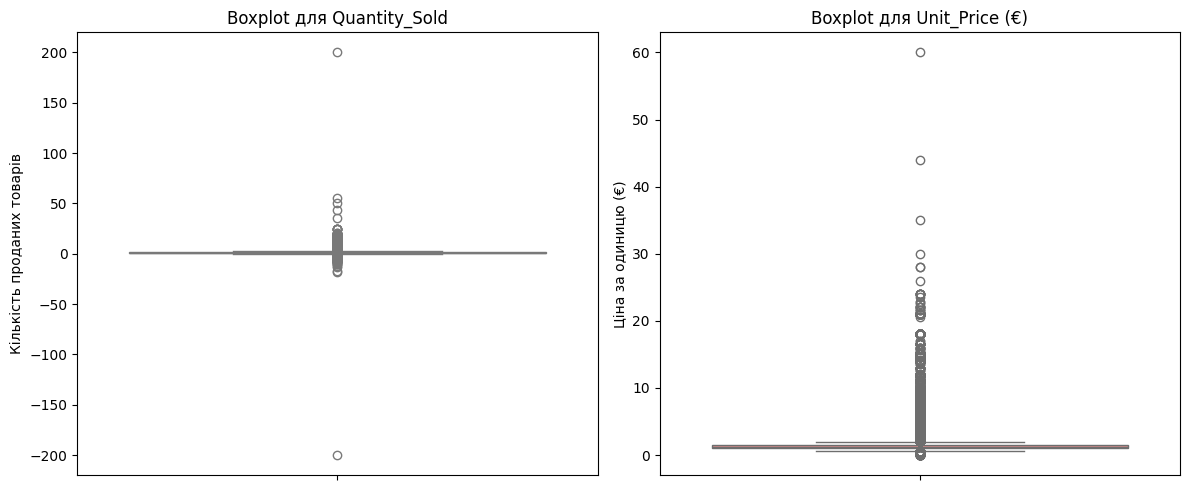

In [ ]:
# Налаштування розміру графіків
plt.figure(figsize=(12, 5))

# Боксплот для Quantity_Sold
plt.subplot(1, 2, 1)
sns.boxplot(y=bakery_sales_data["Quantity_Sold"], color="lightblue")
plt.title("Boxplot для Quantity_Sold")
plt.ylabel("Кількість проданих товарів")

# Боксплот для Unit_Price (€)
plt.subplot(1, 2, 2)
sns.boxplot(y=bakery_sales_data["Unit_Price (€)"], color="lightcoral")
plt.title("Boxplot для Unit_Price (€)")
plt.ylabel("Ціна за одиницю (€)")

# Відображення графіків
plt.tight_layout()
plt.show()

In [ ]:
negative_quantity = bakery_sales_data[bakery_sales_data["Quantity_Sold"] < 0]
print("Кількість записів з від'ємною кількістю проданого товару: ", len(negative_quantity))
negative_quantity.head(10)

Кількість записів з від'ємною кількістю проданого товару:  1269


,Date,Time,Ticket_Number,Product_Name,Quantity_Sold,Unit_Price (€)
441,2021-01-03,10:41:00,150265.0,Baguette,-1.0,0.90
1153,2021-01-05,19:00:00,150738.0,Divers Boulangerie,-1.0,2.00
1154,2021-01-05,19:00:00,150738.0,Divers Patisserie,-1.0,6.00
1155,2021-01-05,19:00:00,150738.0,Special Bread,-1.0,2.40
1458,2021-01-08,11:58:00,150941.0,Boule 400G,-1.0,1.50
1459,2021-01-08,11:58:00,150941.0,Coupe,-1.0,0.15
1460,2021-01-08,11:58:00,150941.0,Croissant,-4.0,1.10
1461,2021-01-08,11:58:00,150941.0,Pain Au Chocolat,-2.0,1.20
2028,2021-01-10,11:43:00,151280.0,Coupe,-1.0,0.15
2029,2021-01-10,11:43:00,151280.0,Vik Bread,-1.0,2.50


Ми залишаємо від’ємні значення у Quantity_Sold, оскільки це повернення товару (анулювання транзакції).

Ці значення допомагають правильно аналізувати загальний обсяг продажів, враховуючи не тільки покупки, але й випадки, коли товари були повернені покупцями або скасовані касиром.

Екстремальні значення Quantity_Sold (200 Та -200):

In [ ]:
# Відбір рядків, де Quantity_Sold = 200 або Quantity_Sold = -200
extreme_quantity = bakery_sales_data[bakery_sales_data["Quantity_Sold"].isin([200, -200])]
extreme_quantity

,Date,Time,Ticket_Number,Product_Name,Quantity_Sold,Unit_Price (€)
50211,2021-06-12,09:58:00,179931.0,Cafe Ou Eau,200.0,1.0
50212,2021-06-12,09:58:00,179932.0,Cafe Ou Eau,-200.0,1.0


Один запис показує продаж 200 одиниць, а інший — повернення (-200 одиниць) у тому ж часовому інтервалі. Це може означати помилковий продаж та ануляцію або ж тестовий запис у системі

In [ ]:
# Видалення рядків, де Quantity_Sold = 200 або Quantity_Sold = -200
bakery_sales_data = bakery_sales_data[~bakery_sales_data["Quantity_Sold"].isin([200, -200])]

# Перевірка, чи рядки були успішно видалені
extreme_values_check = bakery_sales_data[bakery_sales_data["Quantity_Sold"].isin([200, -200])]
extreme_values_check

,Date,Time,Ticket_Number,Product_Name,Quantity_Sold,Unit_Price (€)


In [ ]:
# Обчислення IQR для Quantity_Sold
Q1 = bakery_sales_data["Quantity_Sold"].quantile(0.25)
Q3 = bakery_sales_data["Quantity_Sold"].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

# Відбір рядків, де Quantity_Sold перевищує верхню межу
extreme_quantity_high = bakery_sales_data[bakery_sales_data["Quantity_Sold"] > 15]


In [ ]:
extreme_quantity_high.head(20)

,Date,Time,Ticket_Number,Product_Name,Quantity_Sold,Unit_Price (€)
2840,2021-01-15,10:03:00,151810.0,Croissant,20.0,1.10
22948,2021-03-29,10:43:00,163761.0,Baguette,20.0,0.90
47275,2021-06-04,09:03:00,178175.0,Croissant,20.0,1.10
47276,2021-06-04,09:03:00,178175.0,Pain Au Chocolat,20.0,1.20
57516,2021-07-01,17:53:00,184399.0,Sucette,17.0,0.30
57519,2021-07-01,17:54:00,184401.0,Sucette,18.0,0.30
63689,2021-07-14,09:53:00,187952.0,Traditional Baguette,20.0,1.20
69163,2021-07-23,09:12:00,191125.0,Pain Au Chocolat,20.0,1.20
69356,2021-07-23,11:26:00,191236.0,Tartelette,25.0,2.00
70336,2021-07-25,08:10:00,191804.0,Croissant,18.0,1.10


In [ ]:
zero_price = bakery_sales_data[bakery_sales_data["Unit_Price (€)"] == 0]
print(len(zero_price))

29


In [ ]:
zero_price

,Date,Time,Ticket_Number,Product_Name,Quantity_Sold,Unit_Price (€)
76,2021-01-02,10:51:00,150079.0,Divers Patisserie,1.0,0.0
10301,2021-02-19,10:13:00,156355.0,Divers Boulangerie,1.0,0.0
15249,2021-03-04,12:32:00,159219.0,.,2.0,0.0
15832,2021-03-05,18:18:00,159538.0,Gd Far Breton,1.0,0.0
19759,2021-03-18,12:59:00,161853.0,.,1.0,0.0
24792,2021-04-04,09:53:00,164878.0,.,1.0,0.0
33346,2021-04-27,16:48:00,170079.0,.,1.0,0.0
34437,2021-05-01,10:17:00,170776.0,Divers Patisserie,2.0,0.0
39580,2021-05-13,11:15:00,173793.0,Divers Confiserie,1.0,0.0
61363,2021-07-10,13:25:00,186662.0,.,2.0,0.0


In [ ]:
# Оновлення значень для продуктів без назви
bakery_sales_data.loc[bakery_sales_data["Product_Name"] == ".", "Product_Name"] = "Unknown Product"

In [ ]:
bakery_sales_data[bakery_sales_data["Unit_Price (€)"] == 0]

,Date,Time,Ticket_Number,Product_Name,Quantity_Sold,Unit_Price (€)
76,2021-01-02,10:51:00,150079.0,Divers Patisserie,1.0,0.0
10301,2021-02-19,10:13:00,156355.0,Divers Boulangerie,1.0,0.0
15249,2021-03-04,12:32:00,159219.0,Unknown Product,2.0,0.0
15832,2021-03-05,18:18:00,159538.0,Gd Far Breton,1.0,0.0
19759,2021-03-18,12:59:00,161853.0,Unknown Product,1.0,0.0
24792,2021-04-04,09:53:00,164878.0,Unknown Product,1.0,0.0
33346,2021-04-27,16:48:00,170079.0,Unknown Product,1.0,0.0
34437,2021-05-01,10:17:00,170776.0,Divers Patisserie,2.0,0.0
39580,2021-05-13,11:15:00,173793.0,Divers Confiserie,1.0,0.0
61363,2021-07-10,13:25:00,186662.0,Unknown Product,2.0,0.0


In [ ]:
# Додавання загальної суми покупки
bakery_sales_data["Total_Price (€)"] = bakery_sales_data["Quantity_Sold"] * bakery_sales_data["Unit_Price (€)"]
bakery_sales_data.head()

,Date,Time,Ticket_Number,Product_Name,Quantity_Sold,Unit_Price (€),Total_Price (€)
0,2021-01-02,08:38:00,150040.0,Baguette,1.0,0.90,0.90
1,2021-01-02,08:38:00,150040.0,Pain Au Chocolat,3.0,1.20,3.60
2,2021-01-02,09:14:00,150041.0,Pain,1.0,1.15,1.15
3,2021-01-02,09:14:00,150041.0,Pain Au Chocolat,2.0,1.20,2.40
4,2021-01-02,09:25:00,150042.0,Traditional Baguette,5.0,1.20,6.00


In [ ]:
# Додавання дня тижня для аналізу
bakery_sales_data["Day_of_Week"] = bakery_sales_data["Date"].dt.day_name()

# Додавання стовпців для аналізу сезонності
bakery_sales_data["Year"] = bakery_sales_data["Date"].dt.year
bakery_sales_data["Month"] = bakery_sales_data["Date"].dt.month_name()
bakery_sales_data["Week"] = bakery_sales_data["Date"].dt.isocalendar().week

In [ ]:
# Отримання списку унікальних значень у колонці Product
unique_products = bakery_sales_data["Product_Name"].unique().tolist()
print('Number of unique products: ', len(unique_products))
unique_products

Number of unique products:  149


['Baguette',
 'Pain Au Chocolat',
 'Pain',
 'Traditional Baguette',
 'Croissant',
 'Banette',
 'Banettine',
 'Coupe',
 'Special Bread',
 'Sand Jb Emmental',
 'Kouign Amann',
 'Boule 200G',
 'Boule 400G',
 'Campagne',
 'Gal Frangipane 6P',
 'Moisson',
 'Cafe Ou Eau',
 'Brioche',
 'Cereal Baguette',
 'Seigle',
 'Complet',
 'Divers Patisserie',
 'Gal Frangipane 4P',
 'Cookie',
 'Ficelle',
 'Pain Aux Raisins',
 'Gal Pomme 6P',
 'Gal Pomme 4P',
 'Financier X5',
 'Vik Bread',
 'Divers Viennoiserie',
 'Gache',
 'Sandwich Complet',
 'Pain Banette',
 'Grand Far Breton',
 'Quim Bread',
 'Special Bread Kg',
 'Boule Polka',
 'Gd Kouign Amann',
 'Demi Baguette',
 'Chausson Aux Pommes',
 'Baguette Graine',
 'Divers Confiserie',
 'Sucette',
 'Divers Boulangerie',
 'Boisson 33Cl',
 'Pates',
 'Formule Sandwich',
 'Divers Sandwichs',
 'Croissant Amandes',
 'Pain Choco Amandes',
 'Sachet Viennoiserie',
 'Nantais',
 'Chocolat',
 'Pain S/Sel',
 'Fondant Chocolat',
 'Gal Poire Choco 6P',
 'Gal Poire Choco 4

## Візуалізація даних

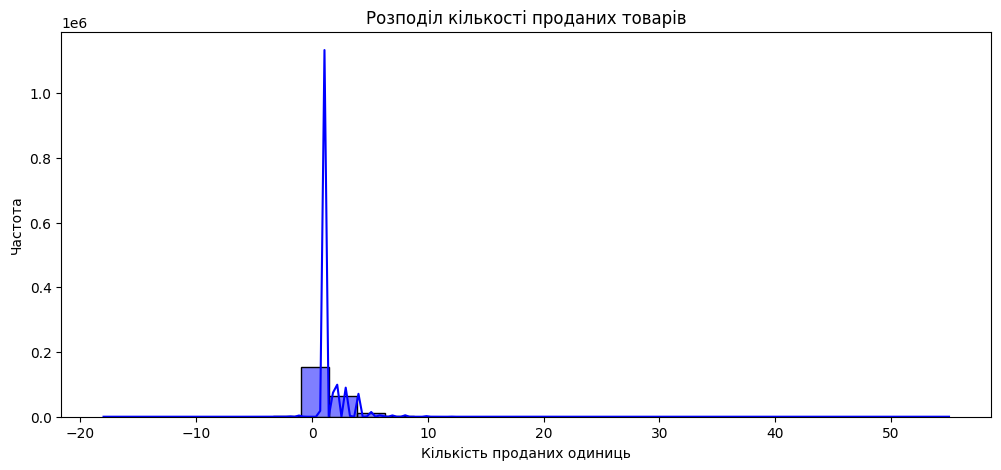

In [ ]:
# Гістограма розподілу кількості проданих товарів
plt.figure(figsize=(12, 5))
sns.histplot(bakery_sales_data["Quantity_Sold"], bins=30, kde=True, color="blue")
plt.title("Розподіл кількості проданих товарів")
plt.xlabel("Кількість проданих одиниць")
plt.ylabel("Частота")
plt.show()

* Більшість товарів продається у невеликих кількостях (1-5 одиниць).

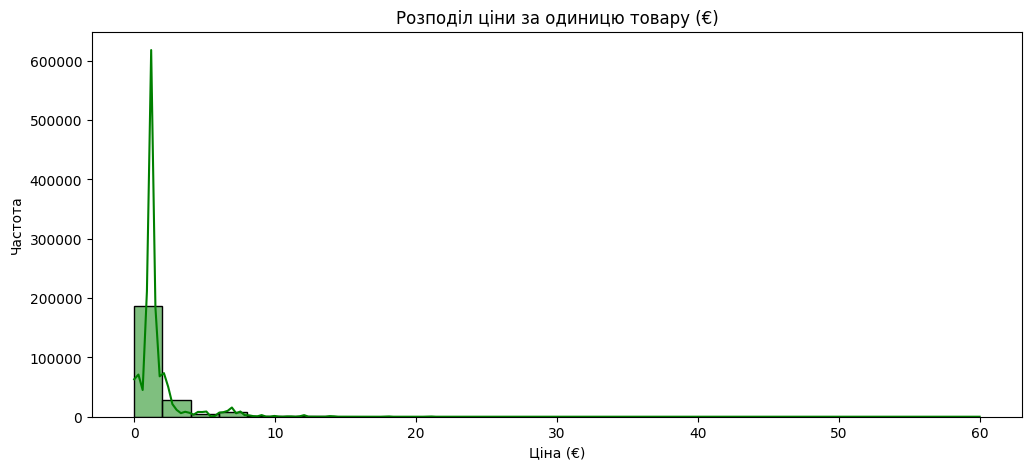

In [ ]:
# Гістограма розподілу цін
plt.figure(figsize=(12, 5))
sns.histplot(bakery_sales_data["Unit_Price (€)"], bins=30, kde=True, color="green")
plt.title("Розподіл ціни за одиницю товару (€)")
plt.xlabel("Ціна (€)")
plt.ylabel("Частота")
plt.show()

* Більшість товарів має низьку вартість (до 5€).
* Є кілька дорогих позицій (>20€), ймовірно, це набори або спеціальні товари.

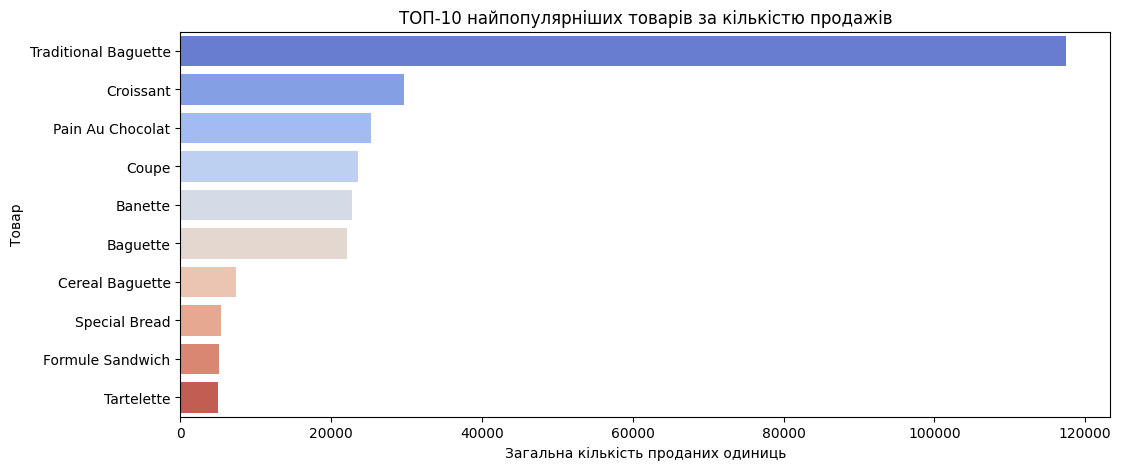

In [ ]:
# ТОП-10 найпопулярніших товарів за кількістю проданих одиниць
top_products = bakery_sales_data.groupby("Product_Name")["Quantity_Sold"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette="coolwarm")
plt.title("ТОП-10 найпопулярніших товарів за кількістю продажів")
plt.xlabel("Загальна кількість проданих одиниць")
plt.ylabel("Товар")
plt.show()

* Лідер продажів – "Traditional Baguette", також популярні Croissant, Pain au Chocolat, Coupe.

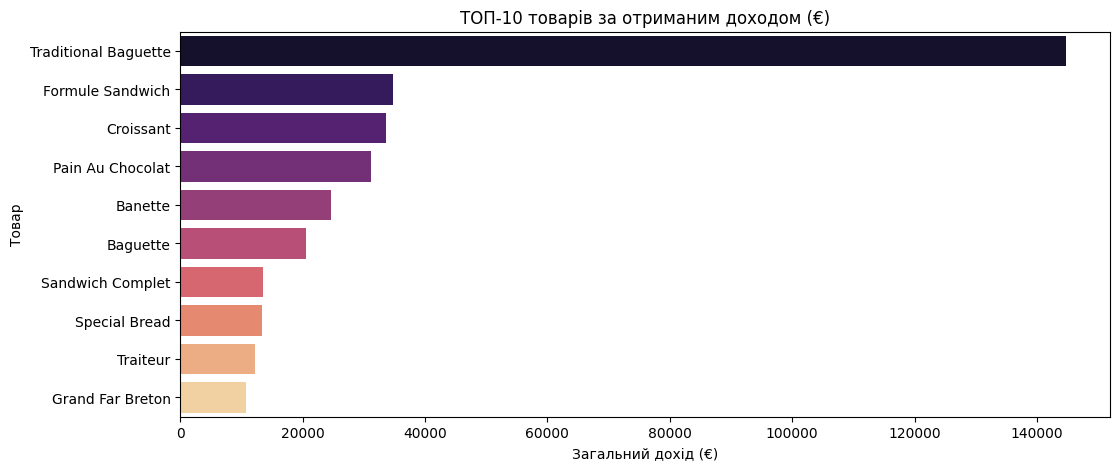

In [ ]:
# ТОП-10 товарів за отриманим доходом
top_revenue_products = bakery_sales_data.groupby("Product_Name")["Total_Price (€)"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 5))
sns.barplot(x=top_revenue_products.values, y=top_revenue_products.index, palette="magma")
plt.title("ТОП-10 товарів за отриманим доходом (€)")
plt.xlabel("Загальний дохід (€)")
plt.ylabel("Товар")
plt.show()

* "Traditional Baguette" приносить найбільший дохід.
* Високий прибуток також дають "Formula Sandwich", "Croissant", "Banette".

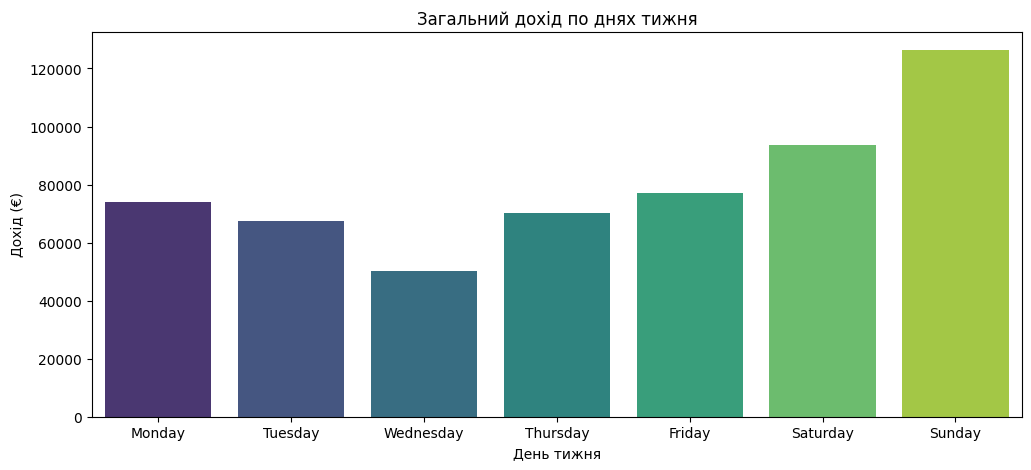

In [ ]:
# Аналіз доходу по днях тижня
sales_by_day = bakery_sales_data.groupby("Day_of_Week")["Total_Price (€)"].sum().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

plt.figure(figsize=(12, 5))
sns.barplot(x=sales_by_day.index, y=sales_by_day.values, palette="viridis")
plt.title("Загальний дохід по днях тижня")
plt.xlabel("День тижня")
plt.ylabel("Дохід (€)")
plt.show()

* Найбільше продажів у вихідні (субота-неділя).
* Найменше – у середу, що може бути корисним для планування акцій.

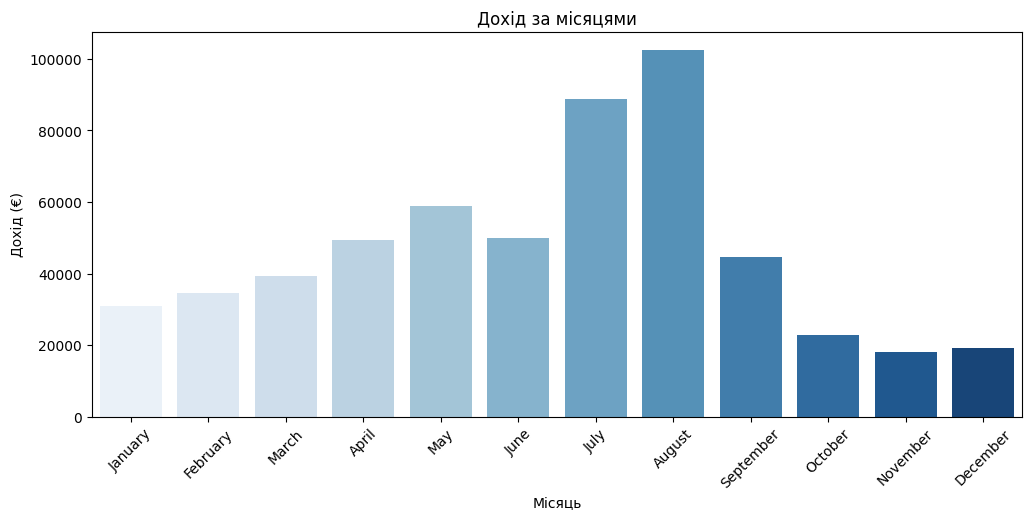

In [ ]:
# Аналіз сезонності продажів (за місяцями)
monthly_sales = bakery_sales_data.groupby("Month")["Total_Price (€)"].sum().reindex([
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"])

plt.figure(figsize=(12, 5))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette="Blues")
plt.title("Дохід за місяцями")
plt.xlabel("Місяць")
plt.ylabel("Дохід (€)")
plt.xticks(rotation=45)
plt.show()

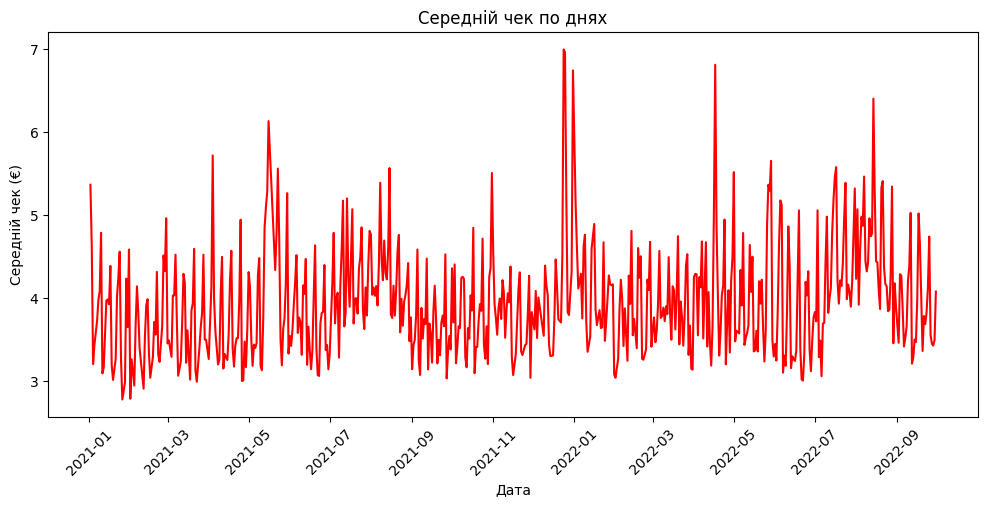

In [ ]:
# Аналіз середнього чека (Total_Price / кількість чеків за день)
average_check = bakery_sales_data.groupby("Date")["Total_Price (€)"].sum() / bakery_sales_data.groupby("Date")["Ticket_Number"].nunique()

plt.figure(figsize=(12, 5))
sns.lineplot(x=average_check.index, y=average_check.values, color="red")
plt.title("Середній чек по днях")
plt.xlabel("Дата")
plt.ylabel("Середній чек (€)")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Аналіз популярних комбінацій товарів (товари, що часто купуються разом)
ticket_products = bakery_sales_data.groupby("Ticket_Number")["Product_Name"].apply(list)

from collections import Counter
pair_counter = Counter()

for products in ticket_products:
    unique_products = list(set(products))
    for i in range(len(unique_products)):
        for j in range(i + 1, len(unique_products)):
            sorted_pair = tuple(sorted([unique_products[i], unique_products[j]]))
            pair_counter[sorted_pair] += 1

top_pairs = pair_counter.most_common(10)
top_pairs_df = pd.DataFrame(top_pairs, columns=["Product_Pair", "Frequency"])
top_pairs_df

,Product_Pair,Frequency
0,"(Coupe, Traditional Baguette)",6116
1,"(Croissant, Pain Au Chocolat)",5394
2,"(Croissant, Traditional Baguette)",4927
3,"(Pain Au Chocolat, Traditional Baguette)",4205
4,"(Boule 400G, Coupe)",3242
5,"(Campagne, Coupe)",3112
6,"(Coupe, Special Bread)",3049
7,"(Boule 200G, Coupe)",2385
8,"(Complet, Coupe)",2314
9,"(Coupe, Vik Bread)",2294


In [ ]:
bakery_sales_data["Hour"] = pd.to_datetime(bakery_sales_data["Time"], format="%H:%M:%S").dt.hour

# Розділення даних на будні (Monday-Friday) та вихідні (Saturday-Sunday)
bakery_sales_data["Day_Type"] = bakery_sales_data["Date"].dt.dayofweek.map(lambda x: "Weekend" if x >= 5 else "Workday")

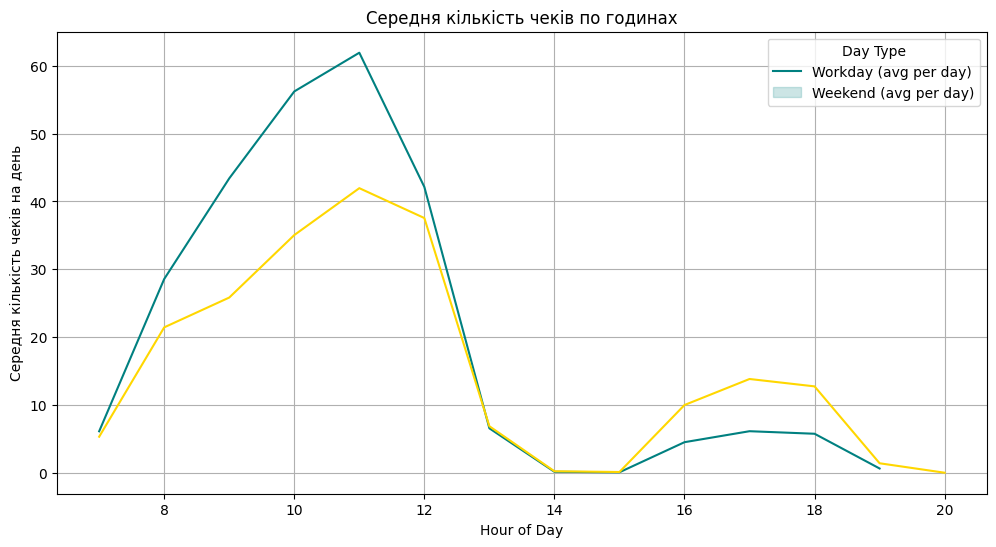

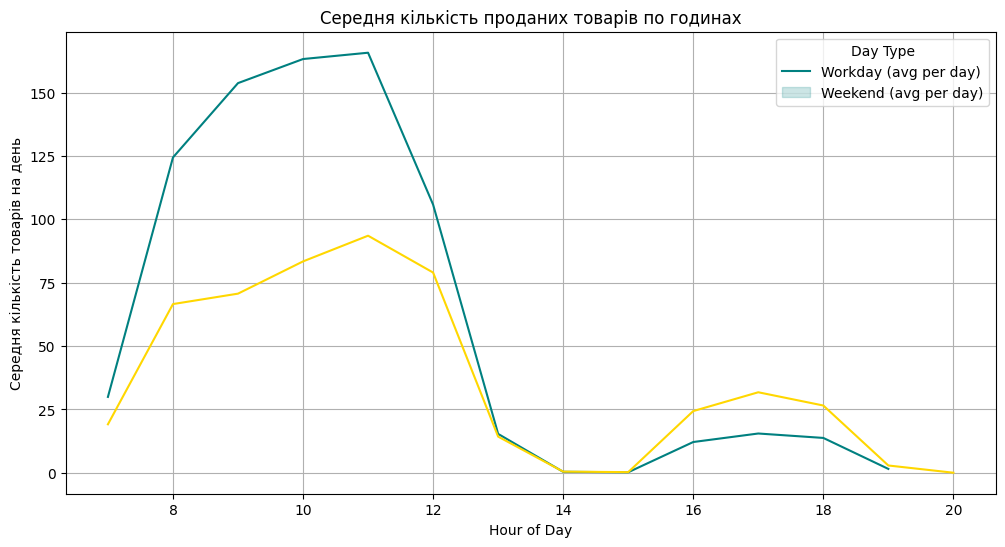

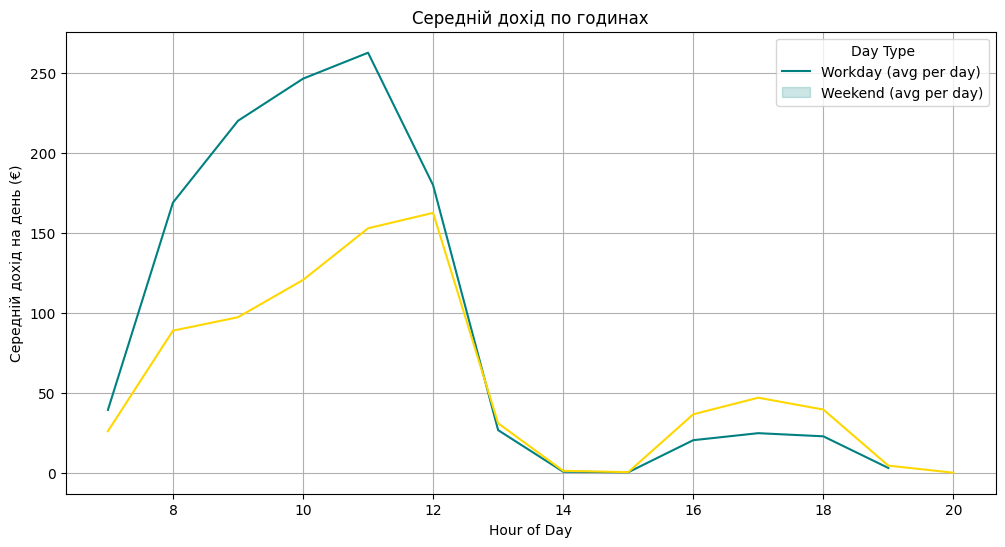

In [ ]:
workday_count = bakery_sales_data[bakery_sales_data["Day_Type"] == "Workday"]["Date"].nunique()
weekend_count = bakery_sales_data[bakery_sales_data["Day_Type"] == "Weekend"]["Date"].nunique()

hourly_transactions = bakery_sales_data.groupby(["Hour", "Day_Type"])["Ticket_Number"].nunique().reset_index()
hourly_transactions.loc[hourly_transactions["Day_Type"] == "Workday", "Ticket_Number"] /= workday_count
hourly_transactions.loc[hourly_transactions["Day_Type"] == "Weekend", "Ticket_Number"] /= weekend_count

hourly_items_sold = bakery_sales_data.groupby(["Hour", "Day_Type"])["Quantity_Sold"].sum().reset_index()
hourly_items_sold.loc[hourly_items_sold["Day_Type"] == "Workday", "Quantity_Sold"] /= workday_count
hourly_items_sold.loc[hourly_items_sold["Day_Type"] == "Weekend", "Quantity_Sold"] /= weekend_count

hourly_revenue = bakery_sales_data.groupby(["Hour", "Day_Type"])["Total_Price (€)"].sum().reset_index()
hourly_revenue.loc[hourly_revenue["Day_Type"] == "Workday", "Total_Price (€)"] /= workday_count
hourly_revenue.loc[hourly_revenue["Day_Type"] == "Weekend", "Total_Price (€)"] /= weekend_count

# Функція для побудови графіків
def plot_hourly_trends(df, y_column, title, ylabel, color1="gold", color2="teal"):
    plt.figure(figsize=(12, 6))
    palette_colors = {"Workday": color1, "Weekend": color2}

    ax = sns.lineplot(
        data=df, x="Hour", y=y_column, hue="Day_Type",
        markers=True, dashes=False, palette=palette_colors
    )
    plt.legend(title="Day Type", labels=["Workday (avg per day)", "Weekend (avg per day)"])

    plt.title(title)
    plt.xlabel("Hour of Day")
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

plot_hourly_trends(hourly_transactions, "Ticket_Number", "Середня кількість чеків по годинах", "Середня кількість чеків на день")
plot_hourly_trends(hourly_items_sold, "Quantity_Sold", "Середня кількість проданих товарів по годинах", "Середня кількість товарів на день")
plot_hourly_trends(hourly_revenue, "Total_Price (€)", "Середній дохід по годинах", "Середній дохід на день (€)")


In [ ]:
bakery_sales_data.head()

,Date,Time,Ticket_Number,Product_Name,Quantity_Sold,Unit_Price (€),Total_Price (€),Day_of_Week,Year,Month,Week,Hour,Day_Type
0,2021-01-02,08:38:00,150040.0,Baguette,1.0,0.90,0.90,Saturday,2021,January,53,8,Weekend
1,2021-01-02,08:38:00,150040.0,Pain Au Chocolat,3.0,1.20,3.60,Saturday,2021,January,53,8,Weekend
2,2021-01-02,09:14:00,150041.0,Pain,1.0,1.15,1.15,Saturday,2021,January,53,9,Weekend
3,2021-01-02,09:14:00,150041.0,Pain Au Chocolat,2.0,1.20,2.40,Saturday,2021,January,53,9,Weekend
4,2021-01-02,09:25:00,150042.0,Traditional Baguette,5.0,1.20,6.00,Saturday,2021,January,53,9,Weekend


In [ ]:
# Обчислення середнього прибутку на день
average_daily_revenue = bakery_sales_data.groupby("Date")["Total_Price (€)"].sum().mean()
average_daily_revenue

931.0730166666667

In [ ]:
# Групування доходу по днях та сортування за спаданням
top_revenue_days = bakery_sales_data.groupby("Date")["Total_Price (€)"].sum().reset_index()
top_revenue_days = top_revenue_days.sort_values(by="Total_Price (€)", ascending=False).head(10)
top_revenue_days

,Date,Total_Price (€)
554,2022-08-14,3184.10
526,2022-07-17,2656.95
207,2021-08-15,2590.00
561,2022-08-21,2571.00
547,2022-08-07,2487.90
540,2022-07-31,2486.55
477,2022-05-29,2392.60
555,2022-08-15,2351.70
525,2022-07-16,2334.00
200,2021-08-08,2276.15


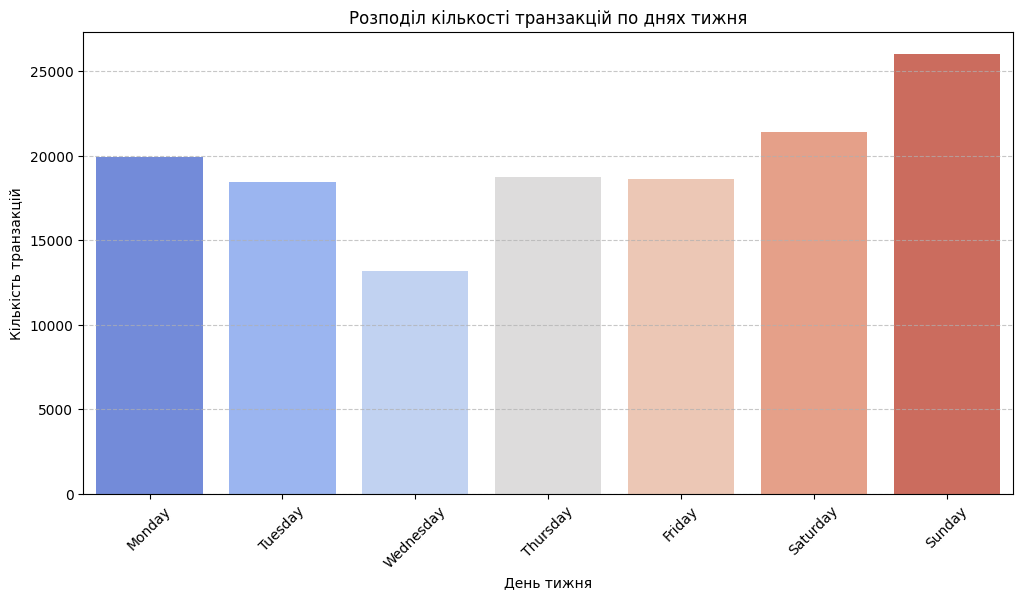

In [ ]:
# Групування кількості унікальних транзакцій по днях тижня
transactions_by_day = bakery_sales_data.groupby("Day_of_Week")["Ticket_Number"].nunique().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

plt.figure(figsize=(12, 6))
sns.barplot(x=transactions_by_day.index, y=transactions_by_day.values, palette="coolwarm")

plt.title("Розподіл кількості транзакцій по днях тижня")
plt.xlabel("День тижня")
plt.ylabel("Кількість транзакцій")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

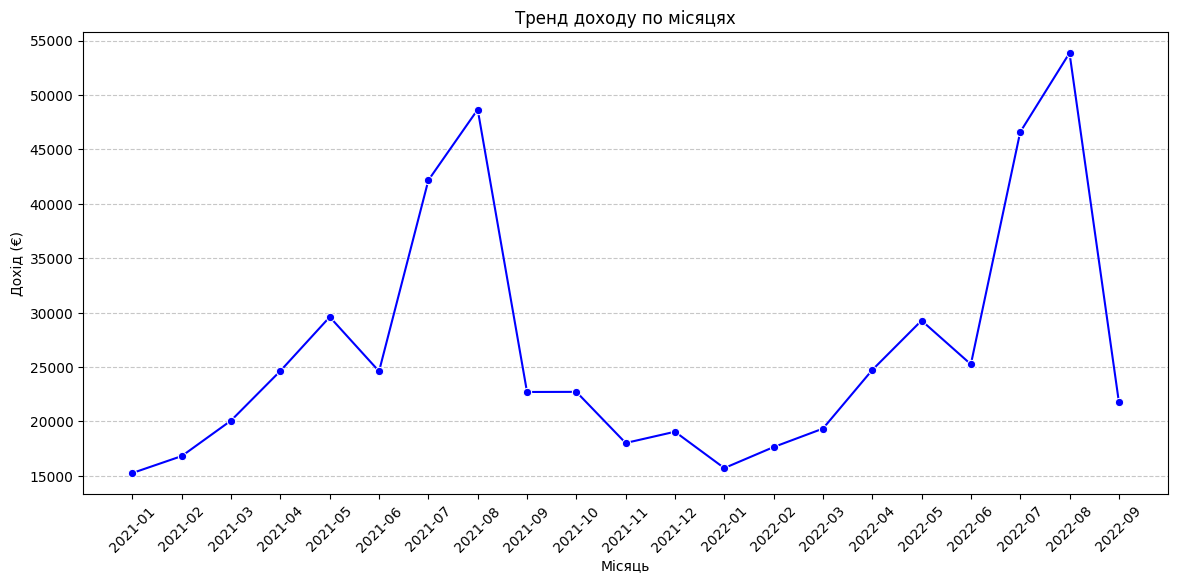

In [ ]:
bakery_sales_data["Year-Month"] = bakery_sales_data["Date"].dt.to_period("M")
monthly_revenue = bakery_sales_data.groupby("Year-Month")["Total_Price (€)"].sum().reset_index()
monthly_revenue["Year-Month"] = monthly_revenue["Year-Month"].astype(str)

# Побудова лінійного графіка тренду доходу по місяцях
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_revenue, x="Year-Month", y="Total_Price (€)", marker="o", color="blue")

plt.title("Тренд доходу по місяцях")
plt.xlabel("Місяць")
plt.ylabel("Дохід (€)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [ ]:
# Визначення годин роботи пекарні за фактичними транзакціями
operating_hours = bakery_sales_data.groupby("Day_of_Week")["Hour"].agg([min, max]).reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
operating_hours


,min,max
Day_of_Week,,
Monday,7,20
Tuesday,7,20
Wednesday,7,20
Thursday,7,20
Friday,7,19
Saturday,7,19
Sunday,7,14


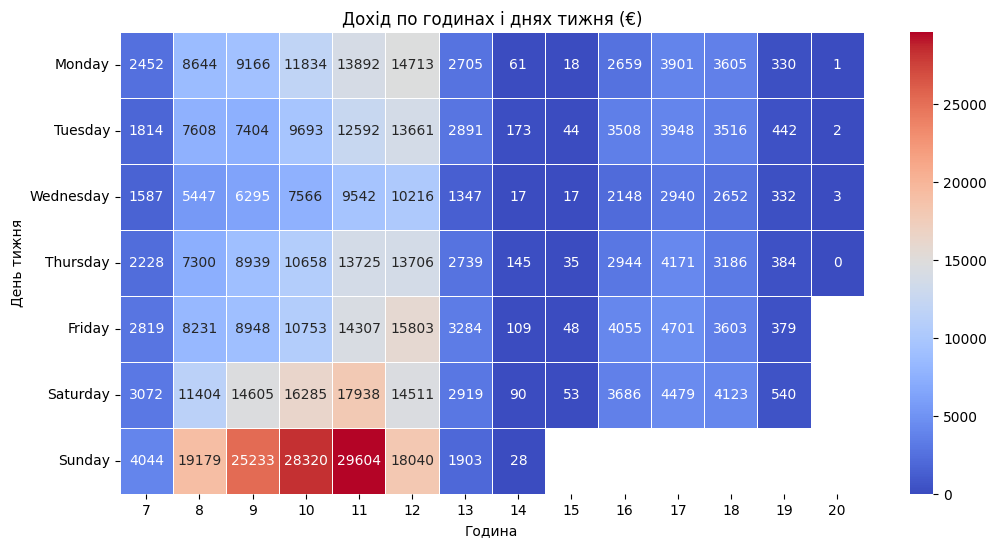

In [ ]:
heatmap_data = bakery_sales_data.groupby(["Day_of_Week", "Hour"])["Total_Price (€)"].sum().unstack()
heatmap_data = heatmap_data.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

# Побудова heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="coolwarm", linewidths=0.5, annot=True, fmt=".0f")
plt.title("Дохід по годинах і днях тижня (€)")
plt.xlabel("Година")
plt.ylabel("День тижня")
plt.show()

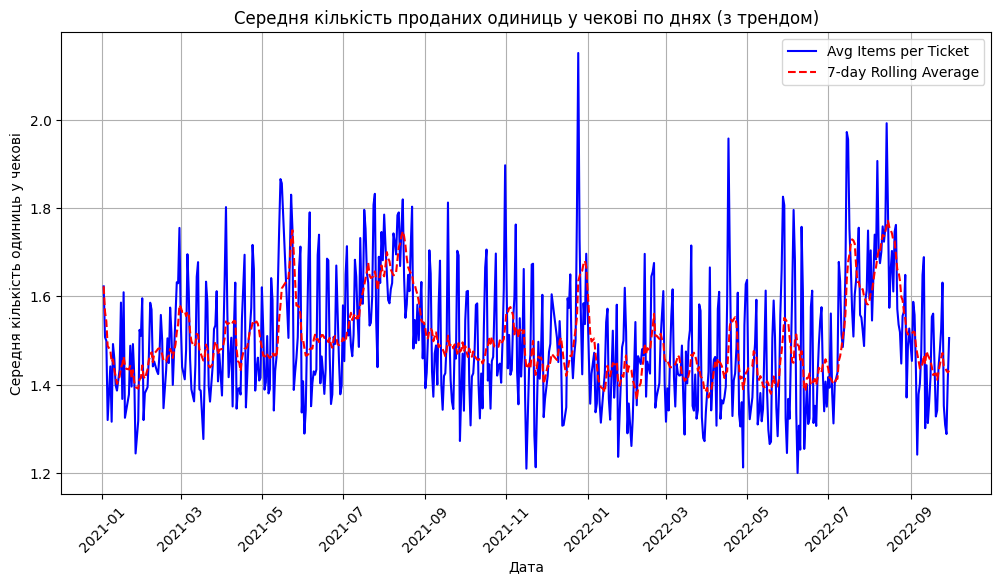

In [ ]:
## Лінійний графік: Середня кількість проданих одиниць у чекові по днях (з трендовою лінією - ковзне середнє)
avg_items_per_ticket = bakery_sales_data.groupby("Date")["Quantity_Sold"].mean().reset_index()
avg_items_per_ticket["Rolling_Avg"] = avg_items_per_ticket["Quantity_Sold"].rolling(window=7, min_periods=1).mean()

plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_items_per_ticket, x="Date", y="Quantity_Sold", label="Avg Items per Ticket", color="blue")
sns.lineplot(data=avg_items_per_ticket, x="Date", y="Rolling_Avg", label="7-day Rolling Average", color="red", linestyle="dashed")
plt.title("Середня кількість проданих одиниць у чекові по днях (з трендом)")
plt.xlabel("Дата")
plt.ylabel("Середня кількість одиниць у чекові")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

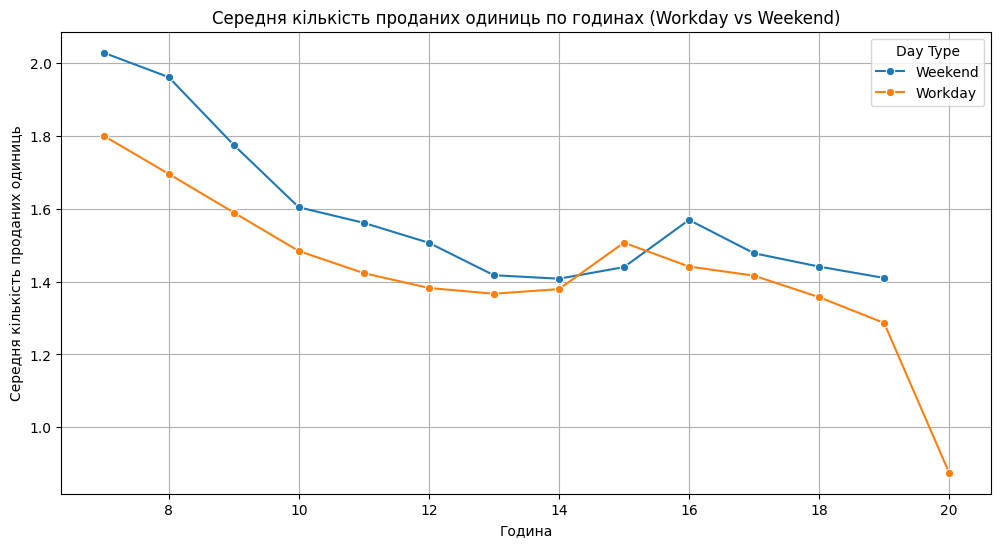

In [ ]:
# Лінійний графік: Середня кількість проданих одиниць по годинах (Workday vs Weekend)
hourly_sales = bakery_sales_data.groupby(["Hour", "Day_Type"])["Quantity_Sold"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_sales, x="Hour", y="Quantity_Sold", hue="Day_Type", marker="o")
plt.title("Середня кількість проданих одиниць по годинах (Workday vs Weekend)")
plt.xlabel("Година")
plt.ylabel("Середня кількість проданих одиниць")
plt.grid(True)
plt.legend(title="Day Type")
plt.show()

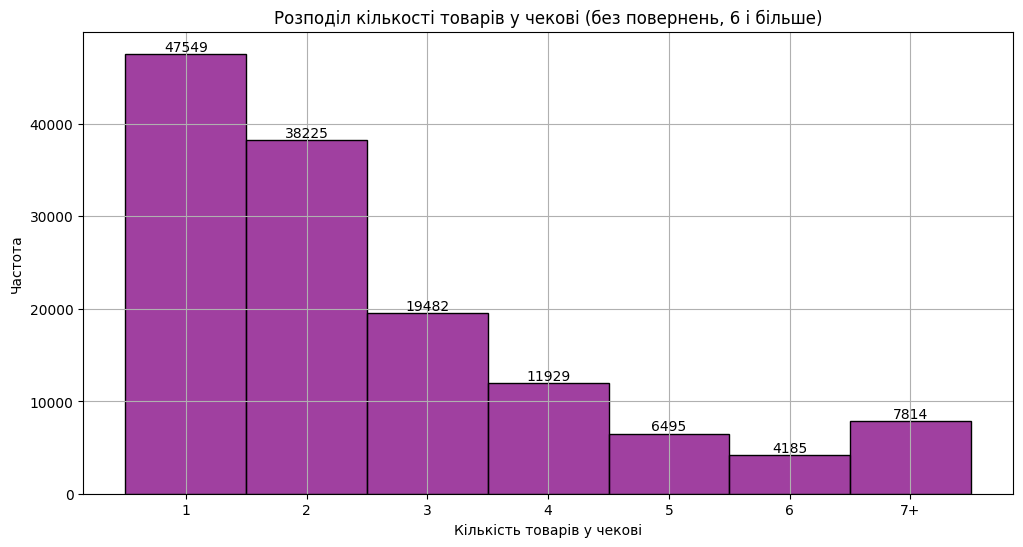

In [ ]:
# Побудова графіку розподілу кількості товарів у чекові
ticket_sales = bakery_sales_data.groupby("Ticket_Number")["Quantity_Sold"].sum()
ticket_sales = ticket_sales[ticket_sales > 0]

# Групування: значення 6+ об'єднуємо в "6 і більше"
ticket_sales = ticket_sales.apply(lambda x: x if x <= 6 else 7)

plt.figure(figsize=(12, 6))
sns.histplot(ticket_sales, bins=[1, 2, 3, 4, 5, 6, 7.5], discrete=True, color="purple")

for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='bottom', fontsize=10, color='black')

plt.title("Розподіл кількості товарів у чекові (без повернень, 6 і більше)")
plt.xlabel("Кількість товарів у чекові")
plt.ylabel("Частота")
plt.xticks([1, 2, 3, 4, 5, 6, 7], labels=["1", "2", "3", "4", "5", "6", "7+"])  # Оновлені підписи осі X
plt.grid(True)
plt.show()

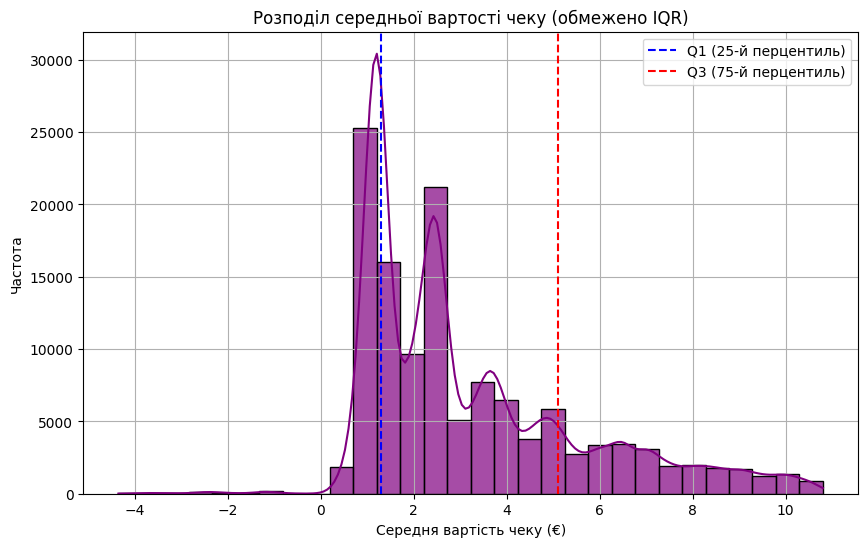

In [ ]:
# Побудова графіку розподілу середньої вартості чеку (обмежено IQR)
avg_ticket_prices = bakery_sales_data.groupby("Ticket_Number")["Total_Price (€)"].sum()
Q1 = np.percentile(avg_ticket_prices, 25)
Q3 = np.percentile(avg_ticket_prices, 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_avg_ticket_prices = avg_ticket_prices[(avg_ticket_prices >= lower_bound) & (avg_ticket_prices <= upper_bound)]

plt.figure(figsize=(10, 6))
sns.histplot(filtered_avg_ticket_prices, bins=30, kde=True, color="purple", alpha=0.7)

plt.axvline(Q1, color='blue', linestyle='dashed', label='Q1 (25-й перцентиль)')
plt.axvline(Q3, color='red', linestyle='dashed', label='Q3 (75-й перцентиль)')

plt.xlabel('Середня вартість чеку (€)')
plt.ylabel('Частота')
plt.title('Розподіл середньої вартості чеку (обмежено IQR)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
bakery_sales_data.to_csv('bakery_daily_sales_new.csv')